# Центральная предельная теорема

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Для выполнения данного задания выбираю Гамма распределение.

Выборка объёма 1000, построение гистограммы выборки, поверх неё теоретическую плотность распределения случайной величины.

Text(0.5, 0, '$x$')

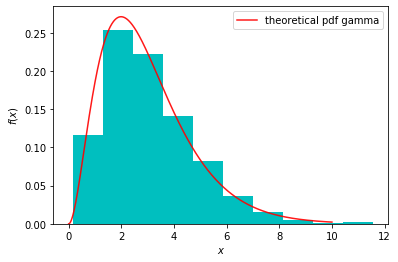

In [79]:
a = 2.99
sample_size = 1000
gamma_rv = sts.gamma(a)
sample = gamma_rv.rvs(sample_size)

df = plt.hist(sample, density=True, color="c")

x = np.linspace(0, 10, sample_size)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf gamma', alpha=0.9, color='r')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


Вычисление параметров нормальных распределений

In [87]:
from math import sqrt
def make_clt(n):
    EX = a
    DX = a
    norm_rv = sts.norm(EX, sqrt(DX/n))
    return norm_rv

Генерация 1000 выборок объёма n и построение гистограммы распределений их выборочных средних.
Поверх каждой гистограммы рисуется плотность соответствующего нормального распределения.

In [97]:
def make_mid_sample(n, sample_size=1000):
    sample_matrix = np.zeros((n, sample_size), dtype=float)
    for i in range(n):
        sample_matrix[i] = gamma_rv.rvs(sample_size)
    mid_sample = np.zeros(sample_size)
    for j in range(sample_size):
        for i in range(n):
            mid_sample[j] += sample_matrix[i][j] 
        mid_sample[j] = mid_sample[j] / n
    df = plt.hist(mid_sample, density=True, color="c",  label='sample')
    
    norm_rv = make_clt(n)
    x = np.linspace(0, 10, sample_size)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.9, color='r')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

    

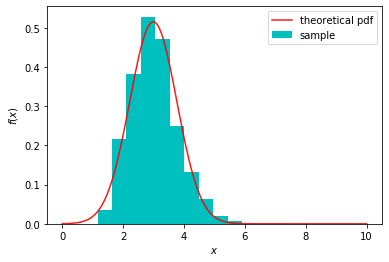

In [98]:
make_mid_sample(5)

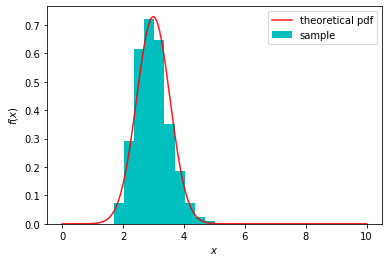

In [99]:
make_mid_sample(10)

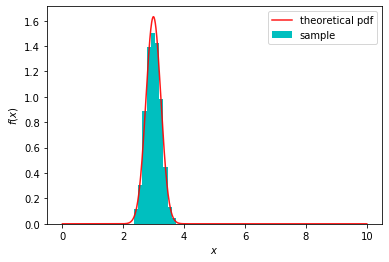

In [100]:
make_mid_sample(50)

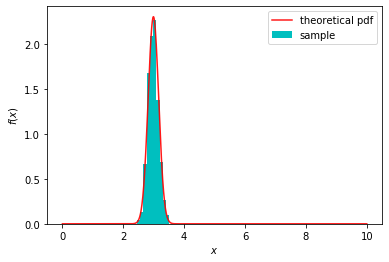

In [101]:
make_mid_sample(100)

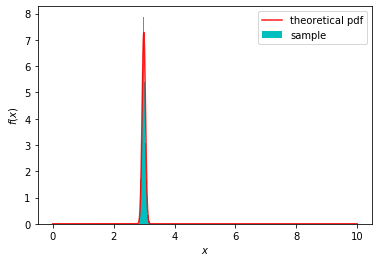

In [102]:
make_mid_sample(1000)

# Вывод

С ростом n точность точность аппроксимации распределения выборочных средних увеличивается. При увеличении объема выборок распределение становится все более гладким и все более похожим на нормальное.